In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

: 

In [3]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.201660,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.096336,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.756721,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.048668,23020500


In [5]:
ma_100_days=data.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

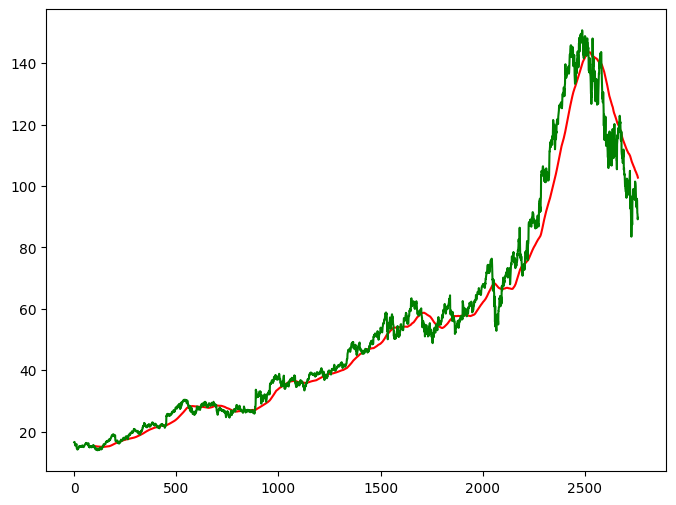

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show

In [7]:
ma_200_days =data.Close.rolling(200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

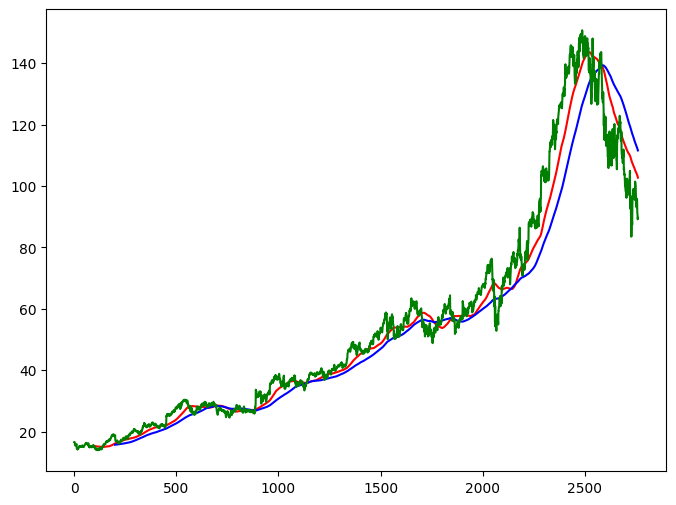

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data. Close [0: int(len(data) *0.80)])
data_test = pd.DataFrame(data. Close [int (len(data) *0.80): len(data)])

In [11]:
data_train.shape[0],data_test.shape[0]

(2208, 553)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale=scaler.fit_transform(data_train)

In [14]:
x=[]
y=[]


for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [15]:
x,y=np.array(x), np.array(y)

In [16]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\kushk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - loss: 0.0662
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 0.0071
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0055
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0067
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0053
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 0.0044
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0046
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - loss: 0.0042
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.0045
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0037
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0040
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0036
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.0029
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step

In [20]:
past_100_days =data_test.tail(100)

In [22]:
data_test= pd.concat([past_100_days,data_test],ignore_index=True)
data_test

,Close
0,115.480003
1,115.900002
2,118.779999
3,118.870003
4,118.220001
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [23]:
data_test_scale=scaler.fit_transform(data_test)

In [24]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y =np.array(x),np.array(y)

In [25]:
y_predict = model.predict(x)
#y_predict

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [30]:
scale=1/scaler.scale_

In [31]:
y_predict=y_predict*scale

In [32]:
y=y*scale

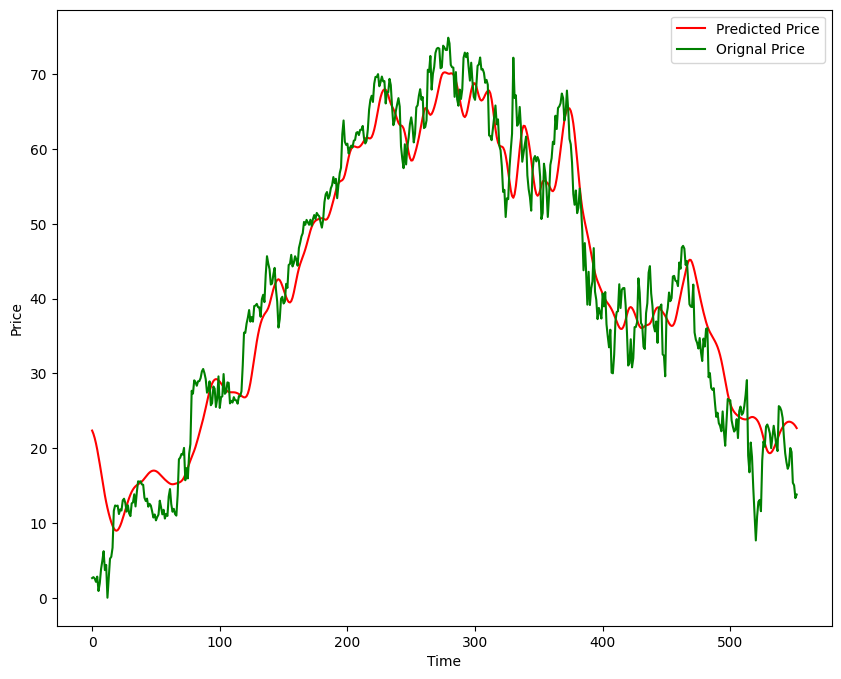

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Orignal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
model.save('Stock Price Prediction Model.keras')